### This notebook can be used to create the JIRA user report based on months
### You need to download the report from JIRA
### Reference for downloading the report - https://community.atlassian.com/t5/Jira-Core-questions/How-to-generate-a-report-and-export-in-excel-sheet/qaq-p/276497
### Change the values as needed

In [2]:
import pandas as pd
from vincent.colors import brews

In [3]:
### Reading Jira report and converting to dataframe
### Also Adding a new column called Total_Tickets to get the sum of each users

In [4]:
df = pd.read_csv('data/JIRA_report.csv')
df['Total_Tickets'] = 1
df

,Issue Type,Issue key,Issue id,Parent id,Summary,Assignee,Reporter,Status,Created,Total_Tickets
0,Task,DSOSEC-2501,78126,NaN,"Alert Logic Case: A&E Television Networks, LLC...",subin.m,devops,Closed,06/Feb/20 8:40 PM,1
1,Task,DSOCS-617,78115,NaN,DSOCS: Trusted Advisor Review,kittu.sabu,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1
2,Task,DSOCS-615,78113,NaN,DSOCS: Review Alertlogic Config,kittu.sabu,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1
3,Task,DSOEM-137,78111,NaN,DSOEM: 1st Daily Patch Rebuild,subin.m,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1
4,Task,DSOSEC-2500,78107,NaN,Escalated Incident (ID:efbjkh) : Burpcolab det...,subin.m,devops,Closed,06/Feb/20 5:30 AM,1
...,...,...,...,...,...,...,...,...,...,...
995,Task,DSO-7902,74247,NaN,AWS Rotate VIP IAM Keys,subin.m,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1
996,Task,DSO-7900,74245,NaN,Daily Prowler Review,kittu.sabu,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1
997,Task,DSO-7899,74244,NaN,Review Centrify Agents,kittu.sabu,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1
998,Task,DSO-7897,74242,NaN,Review Alertlogic Config,subin.m,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1


In [5]:
### Dropping unwanted columns

In [6]:
df = df.drop(columns=['Issue id', 'Parent id', 'Issue Type'])

In [7]:
sub = 'Jan/20'
df["Indexes"]= df["Created"].str.find(sub)
df

,Issue key,Summary,Assignee,Reporter,Status,Created,Total_Tickets,Indexes
0,DSOSEC-2501,"Alert Logic Case: A&E Television Networks, LLC...",subin.m,devops,Closed,06/Feb/20 8:40 PM,1,-1
1,DSOCS-617,DSOCS: Trusted Advisor Review,kittu.sabu,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1,-1
2,DSOCS-615,DSOCS: Review Alertlogic Config,kittu.sabu,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1,-1
3,DSOEM-137,DSOEM: 1st Daily Patch Rebuild,subin.m,devsecops.jira_soccomply,Closed,06/Feb/20 1:00 PM,1,-1
4,DSOSEC-2500,Escalated Incident (ID:efbjkh) : Burpcolab det...,subin.m,devops,Closed,06/Feb/20 5:30 AM,1,-1
...,...,...,...,...,...,...,...,...
995,DSO-7902,AWS Rotate VIP IAM Keys,subin.m,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1,-1
996,DSO-7900,Daily Prowler Review,kittu.sabu,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1,-1
997,DSO-7899,Review Centrify Agents,kittu.sabu,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1,-1
998,DSO-7897,Review Alertlogic Config,subin.m,devsecops.jira_soccomply,Closed,21/Oct/19 5:54 PM,1,-1


In [8]:
### Removing rows based on column (Indexes) value

In [9]:
df = df[df.Indexes != -1]
df

,Issue key,Summary,Assignee,Reporter,Status,Created,Total_Tickets,Indexes
41,DSO-8929,Fixing Cerebro env variable in prod,anudeep.gulla,anudeep.gulla,Closed,31/Jan/20 11:13 PM,1,3
42,DSO-8928,Offboarding user Benjamin Flores,anudeep.gulla,anudeep.gulla,Closed,31/Jan/20 9:59 PM,1,3
43,DSOSEC-2485,"Alert Logic Case: A&E Television Networks, LLC...",subin.m,devops,Closed,31/Jan/20 9:03 PM,1,3
44,DSOCS-592,DSOCS: Trusted Advisor Review,kittu.sabu,devsecops.jira_soccomply,Closed,31/Jan/20 1:00 PM,1,3
45,DSOCS-590,DSOCS: Review Alertlogic Config,kittu.sabu,devsecops.jira_soccomply,Closed,31/Jan/20 1:00 PM,1,3
...,...,...,...,...,...,...,...,...
388,DSOCS-316,DSOCS: Review Centrify Agents,subin.m,devsecops.jira_soccomply,Closed,01/Jan/20 6:33 PM,1,3
389,DSOCS-317,DSOCS: AWS Security Groups Review,subin.m,devsecops.jira_soccomply,Closed,01/Jan/20 6:33 PM,1,3
390,DSOCS-318,DSOCS: AWS Elastic IP Review,subin.m,devsecops.jira_soccomply,Closed,01/Jan/20 6:33 PM,1,3
391,DSOCS-319,DSOCS: Review Alertlogic Config,subin.m,devsecops.jira_soccomply,Closed,01/Jan/20 6:33 PM,1,3


In [10]:
### Adding local path of the final report

In [11]:
path = r"/Users/vkumar/Documents/jupyter-notebook/User_Jan_report.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

In [12]:
### Creating a new Dataframe called "df2" with only the user and total tickets

In [13]:
df_new = df[['Assignee', 'Total_Tickets']]
df2 = df_new.groupby('Assignee')['Total_Tickets'].sum().to_frame().reset_index().sort_values(by='Total_Tickets')
df2

,Assignee,Total_Tickets
1,harish.kumar,3
0,anudeep.gulla,14
3,smaran.na,14
5,vipin.kumar,19
4,subin.m,92
2,kittu.sabu,210


### Charts For Testing (Optional)

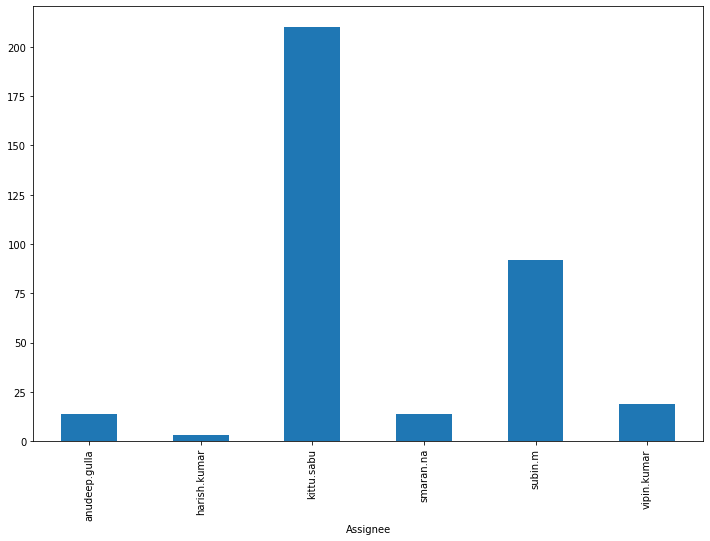

In [14]:
%matplotlib inline
df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='bar',
    figsize=(12,8)
)

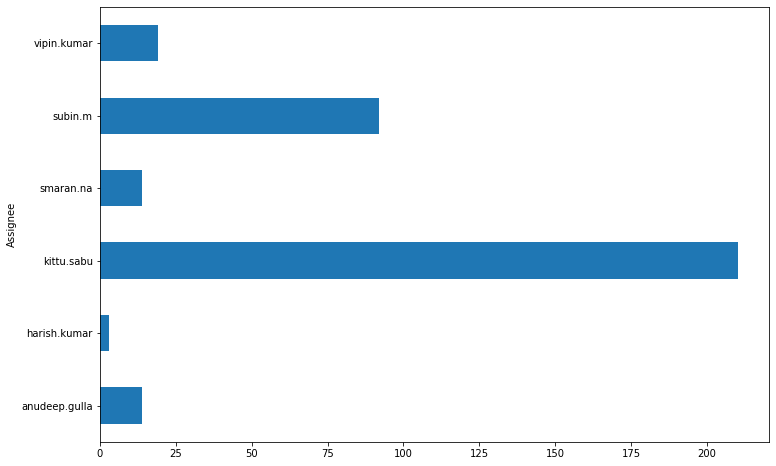

In [15]:
%matplotlib inline
df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='barh',
    figsize=(12,8)
)

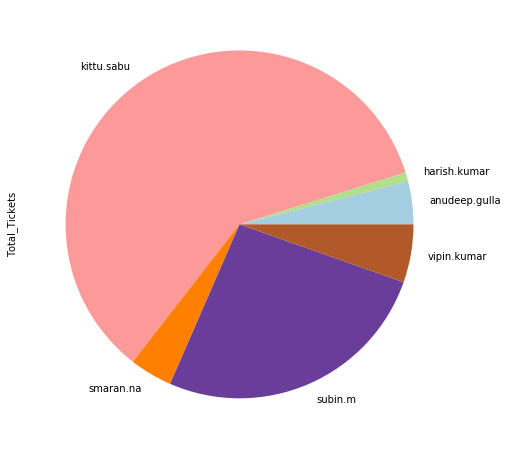

In [16]:
%matplotlib inline
chart = df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='pie',
    figsize=(12,8),
    colormap='Paired'
)

In [17]:
df = df.drop(columns=['Indexes', 'Total_Tickets'])
df.sort_values(by=['Created'], inplace=True)
df['Created'] = pd.to_datetime(df['Created'])

In [18]:
gk = df.groupby('Assignee')
Vipin = gk.get_group('vipin.kumar')
Kittu = gk.get_group('kittu.sabu')
Anudeep = gk.get_group('anudeep.gulla')
Harish = gk.get_group('harish.kumar')
Subin = gk.get_group('subin.m')
Smaran = gk.get_group('smaran.na')
gk.get_group('vipin.kumar')

,Issue key,Summary,Assignee,Reporter,Status,Created
375,VIP-2909,Fixing Prowler - 7.20 [extra720] Check if Lamb...,vipin.kumar,subin.m,DONE,2020-01-02 16:26:00
374,VIP-2910,Fixing Prowler - 7.28 [extra728] Check if SQS ...,vipin.kumar,subin.m,DONE,2020-01-02 16:33:00
373,VIP-2911,Fixing Prowler - 7.61 [extra761] Check if EBS ...,vipin.kumar,subin.m,DONE,2020-01-02 16:41:00
372,VIP-2912,Fixing Prowler - 7.62 [extra762] Find obsolete...,vipin.kumar,subin.m,DONE,2020-01-02 18:33:00
362,VIP-2913,Fixing Prowler - 7.40 [extra740] Check if EBS ...,vipin.kumar,subin.m,DONE,2020-01-02 18:40:00
360,VIP-2915,Fixing Prowler - 1.4 [check14] Ensure access ...,vipin.kumar,subin.m,DONE,2020-01-03 14:03:00
359,VIP-2916,Fixing Prowler - 7.1 [extra71] Ensure users of...,vipin.kumar,subin.m,DONE,2020-01-03 14:05:00
358,VIP-2917,Fixing Prowler - 7.4 [extra74] Ensure there ar...,vipin.kumar,subin.m,DONE,2020-01-03 14:08:00
356,VIP-2918,Fixing Prowler - 7.28 [extra728] Check if SQS ...,vipin.kumar,subin.m,DONE,2020-01-03 14:37:00
355,VIP-2919,Fixing Prowler - 7.29 [extra729] Ensure there ...,vipin.kumar,subin.m,DONE,2020-01-03 14:40:00


In [19]:
with pd.ExcelWriter(path) as writer:
    df2.to_excel(writer, sheet_name='Overall_Performance', index=False)
    Vipin.to_excel(writer, sheet_name='Vipin', index=False)
    Kittu.to_excel(writer, sheet_name='Kittu', index=False)
    Anudeep.to_excel(writer, sheet_name='Anudeep', index=False)
    Harish.to_excel(writer, sheet_name='Harish', index=False)
    Smaran.to_excel(writer, sheet_name='Smaran', index=False)
    Subin.to_excel(writer, sheet_name='Subin', index=False)
    workbook = writer.book
    worksheet = writer.sheets['Overall_Performance']
    chart = workbook.add_chart({'type': 'bar'})
    chart.add_series({
        'categories': '=Overall_Performance!A2:A7',
        'values':     '=Overall_Performance!B2:B7',
        'points': [
            {'fill': {'color': brews['Set1'][0]}},
            {'fill': {'color': brews['Set1'][1]}},
            {'fill': {'color': brews['Set1'][2]}},
            {'fill': {'color': brews['Set1'][3]}},
            {'fill': {'color': brews['Set1'][4]}},
            {'fill': {'color': brews['Set1'][5]}}
        ],
    })
    worksheet.insert_chart('D4', chart)
    writer.save()
    writer.close()